<a href="https://colab.research.google.com/github/Eder-Ramirez-Perez/Analisis-de-CityBlend/blob/main/Predicci%C3%B3n_de_Esperanza_de_Vida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/Colab Notebooks/CienciadeDatosConPython2025/Archivos/Life_Expectancy_Data.csv"

import pandas as pd

# Cargar el dataset
df = pd.read_csv(file_path)

# Mostrar las primeras filas
df.head()

Mounted at /content/drive


,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
# Verificar la cantidad de valores nulos por columna
missing_values = df.isnull().sum()

# Mostrar columnas con valores nulos
missing_values[missing_values > 0]

# Calcular el porcentaje de valores nulos por columna
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Mostrar columnas con valores nulos y su porcentaje
missing_percentage[missing_percentage > 0]


,0
Life expectancy,0.340368
Adult Mortality,0.340368
Alcohol,6.603131
Hepatitis B,18.822328
BMI,1.157250
Polio,0.646698
Total expenditure,7.692308
Diphtheria,0.646698
GDP,15.248468
Population,22.191967


In [8]:
# Rellenar con la moda (valor más frecuente)
df.fillna(df.mode().iloc[0], inplace=True)

# O con un valor específico, como 'Desconocido'
df.fillna('Desconocido', inplace=True)



In [9]:
# Confirmar que ya no hay valores nulos
df.isnull().sum().sum()


0

In [11]:
# Ver uso de memoria total del DataFrame
df.info()

#Uso total de memoria en MB
# Uso total de memoria en MB
memory_usage_MB = df.memory_usage(deep=True).sum() / (1024 * 1024)
print(f"Uso total de memoria: {memory_usage_MB:.2f} MB")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2938 non-null   float64
 3   Adult Mortality                  2938 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2938 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2938 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2938 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2938 non-null   float64
 12  Total expenditure   

In [33]:
# Eliminar espacios en los nombres de las columnas
df.columns = df.columns.str.strip()

# Calcular la esperanza de vida mínima, media y máxima
life_expectancy_min = df["Life expectancy"].min()
life_expectancy_mean = df["Life expectancy"].mean()
life_expectancy_max = df["Life expectancy"].max()

# Mostrar los resultados
print(f" Esperanza de vida mínima: {life_expectancy_min:.2f} años")
print(f" Esperanza de vida media: {life_expectancy_mean:.2f} años")
print(f" Esperanza de vida máxima: {life_expectancy_max:.2f} años")





 Esperanza de vida mínima: 36.30 años
 Esperanza de vida media: 69.24 años
 Esperanza de vida máxima: 89.00 años


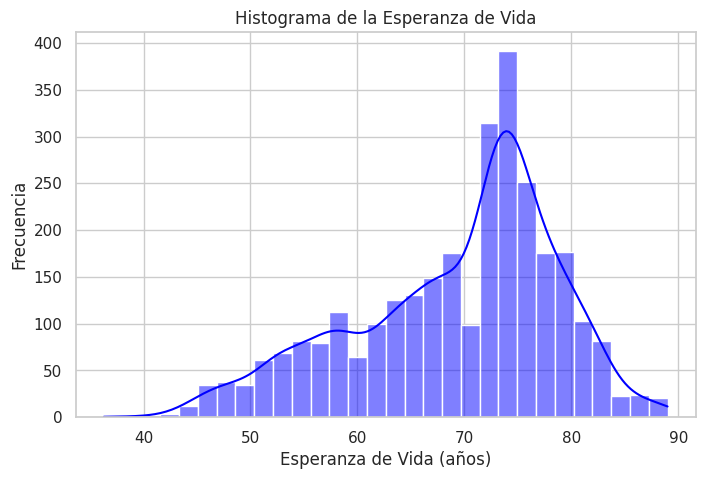

<Figure size 1000x1000 with 0 Axes>

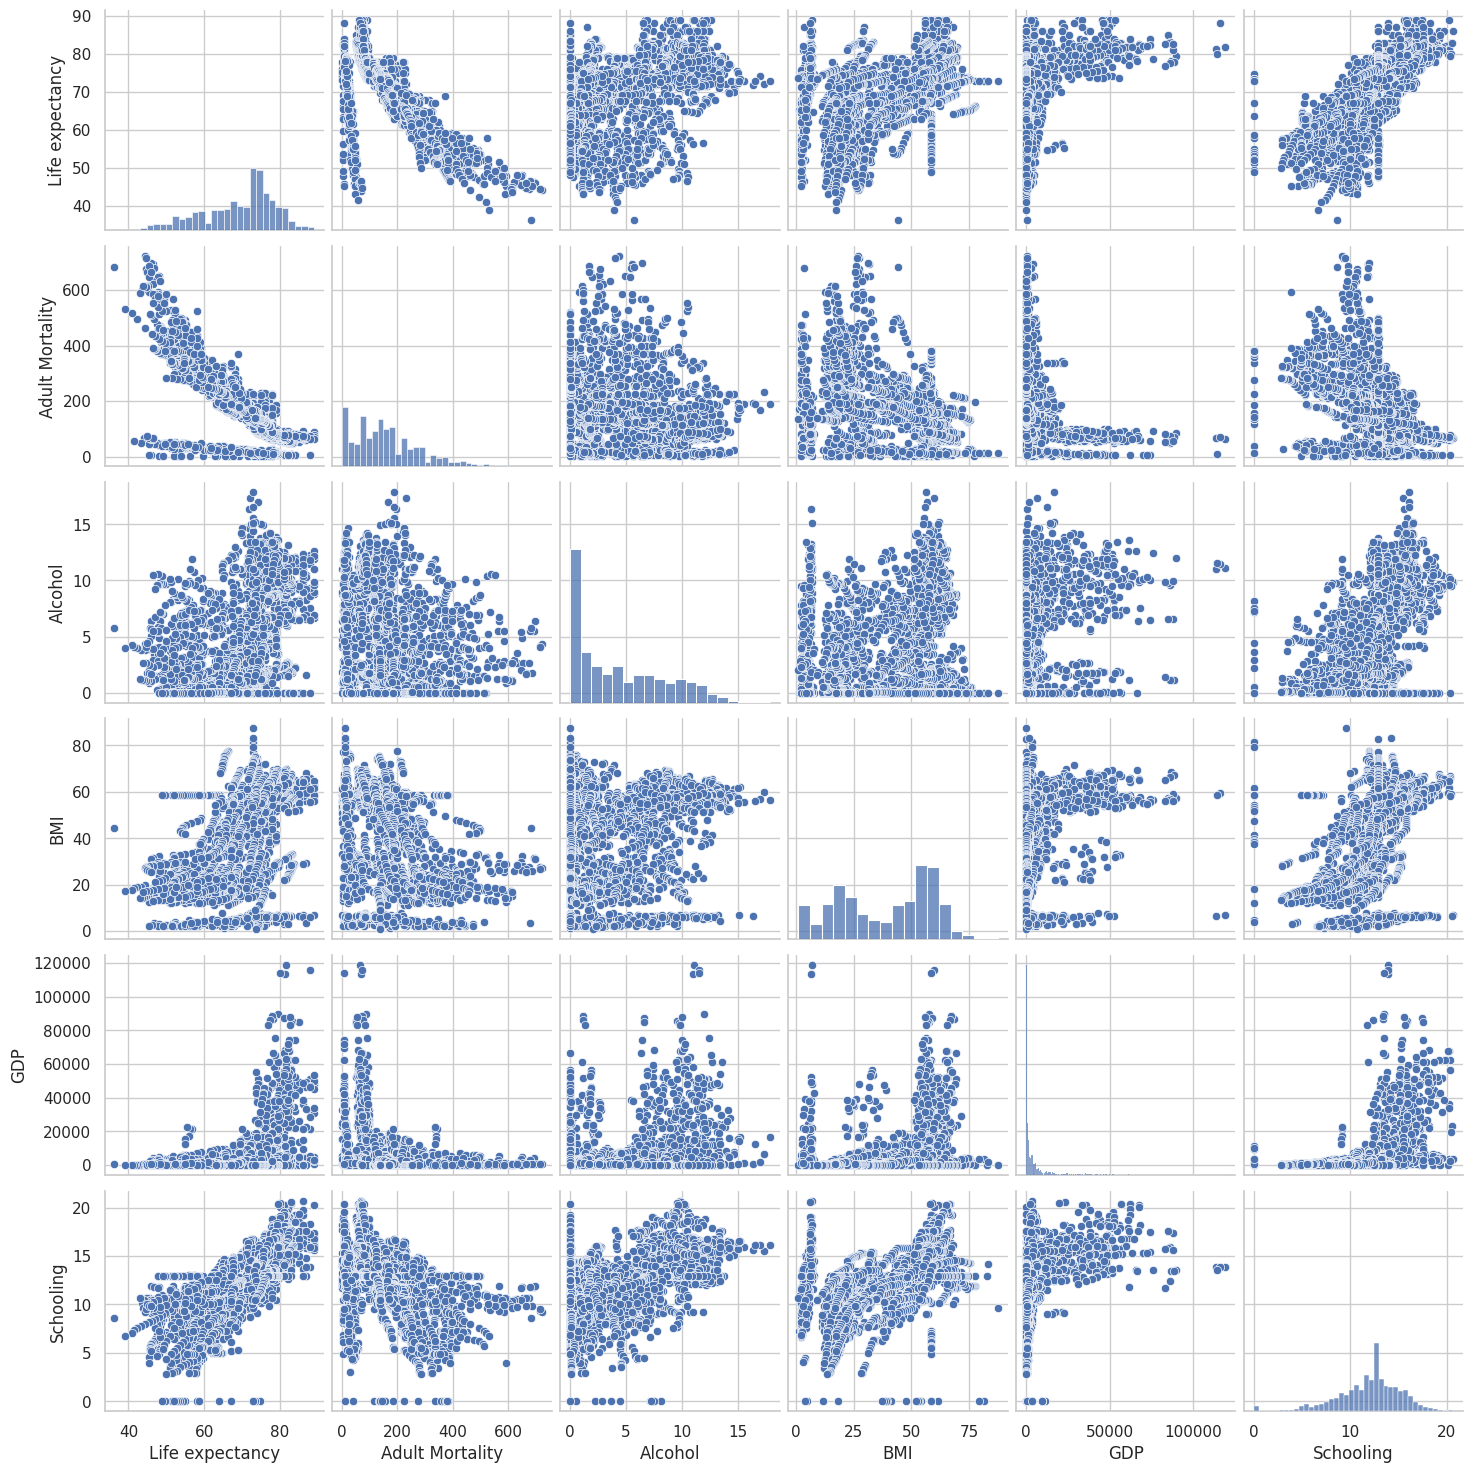

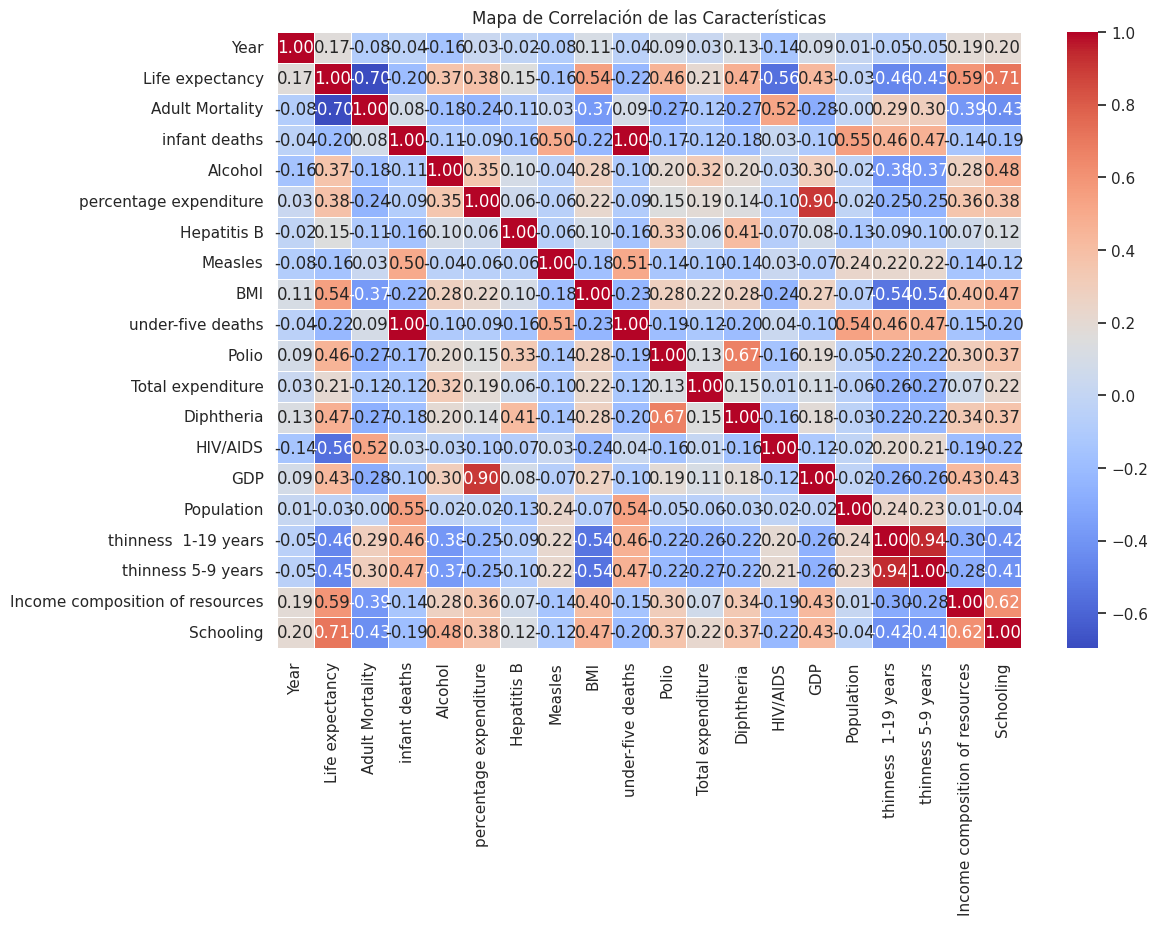

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo las columnas numéricas antes de calcular la correlación
numeric_df = df.select_dtypes(include=['number'])

# Histograma de la esperanza de vida
plt.figure(figsize=(8, 5))
sns.histplot(df["Life expectancy"], bins=30, kde=True, color="blue")
plt.xlabel("Esperanza de Vida (años)")
plt.ylabel("Frecuencia")
plt.title("Histograma de la Esperanza de Vida")
plt.show()

# Diagrama de Pares (Pairplot)
plt.figure(figsize=(10, 10))
sns.pairplot(numeric_df[['Life expectancy', 'Adult Mortality', 'Alcohol', 'BMI', 'GDP', 'Schooling']])
plt.show()

# Mapa de Correlación (Heatmap)
plt.figure(figsize=(12, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Correlación de las Características")
plt.show()



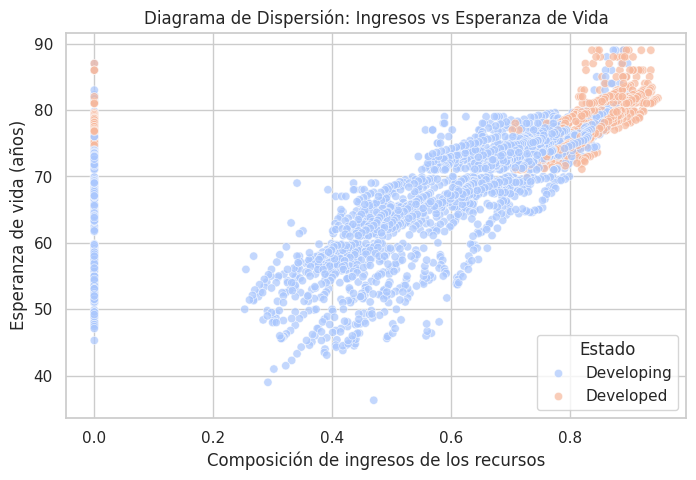


**Análisis del Gráfico: Composición de Ingresos vs Esperanza de Vida**

**Relación Positiva:** A mayor composición de ingresos, mayor esperanza de vida.
**Países Desarrollados:** Mayor esperanza de vida con menos variabilidad.
**Países en Desarrollo:** Más dispersión, indicando que otros factores influyen.
**Zona Crítica:** Algunos países con baja esperanza de vida a pesar de ingresos moderados.
**Conclusión:** Los ingresos son clave, pero otros factores como salud y educación también importan.


In [21]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de dispersión entre "Composición de ingresos de los recursos" y "Esperanza de vida"
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x="Income composition of resources",
    y="Life expectancy",
    hue="Status",  # Usar "Status" como color
    palette="coolwarm",
    alpha=0.7  # Transparencia para mejor visualización
)

# Configuración del gráfico
plt.xlabel("Composición de ingresos de los recursos")
plt.ylabel("Esperanza de vida (años)")
plt.title("Diagrama de Dispersión: Ingresos vs Esperanza de Vida")
plt.legend(title="Estado")
plt.show()

# Texto explicativo del gráfico
analysis_text = """
**Análisis del Gráfico: Composición de Ingresos vs Esperanza de Vida**

**Relación Positiva:** A mayor composición de ingresos, mayor esperanza de vida.
**Países Desarrollados:** Mayor esperanza de vida con menos variabilidad.
**Países en Desarrollo:** Más dispersión, indicando que otros factores influyen.
**Zona Crítica:** Algunos países con baja esperanza de vida a pesar de ingresos moderados.
**Conclusión:** Los ingresos son clave, pero otros factores como salud y educación también importan.
"""

# Imprimir el análisis en Google Colab
from IPython.display import display, Markdown
display(Markdown(analysis_text))


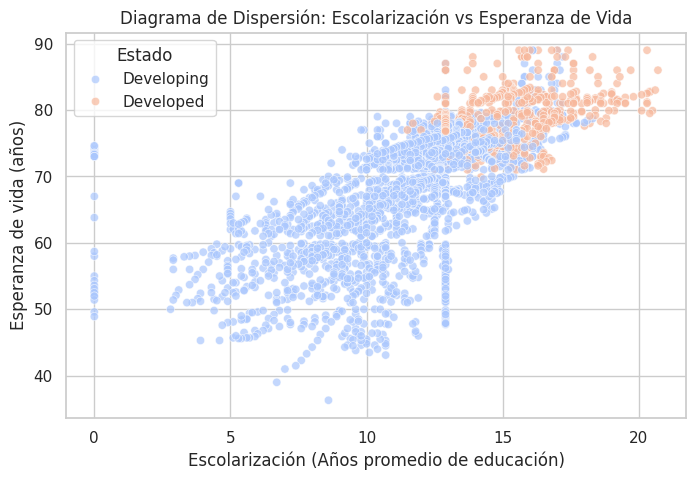

In [22]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de dispersión entre "Escolarización" y "Esperanza de vida"
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x="Schooling",
    y="Life expectancy",
    hue="Status",  # Usar "Status" como color
    palette="coolwarm",
    alpha=0.7  # Transparencia para mejor visualización
)

# Configuración del gráfico
plt.xlabel("Escolarización (Años promedio de educación)")
plt.ylabel("Esperanza de vida (años)")
plt.title("Diagrama de Dispersión: Escolarización vs Esperanza de Vida")
plt.legend(title="Estado")

# Mostrar el gráfico
plt.show()


In [24]:
# Importación de librerías necesarias
from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)
X = df.drop(columns=["Life expectancy"])  # Eliminar la variable objetivo del conjunto de características
y = df["Life expectancy"]  # Variable objetivo

# Dividir los datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar tamaños de los conjuntos
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2350, 20), (588, 20), (2350,), (588,))

In [25]:
!pip install xgboost


In [26]:
# Importar librerías necesarias
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Convertir variables categóricas en variables numéricas mediante One-Hot Encoding
X = pd.get_dummies(df.drop(columns=["Life expectancy"]), drop_first=True)

# Dividir los datos nuevamente con las variables transformadas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo XGBoost
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = xgb_model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
mae, mse, rmse, r2


(1.064038030144309, 2.6062893681455246, 1.614400621947825, 0.9699351525771028)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Hacer predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)

# Imprimir el resultado de R²
print(f" R² del modelo XGBoost: {r2:.4f}")


 R² del modelo XGBoost: 0.9699


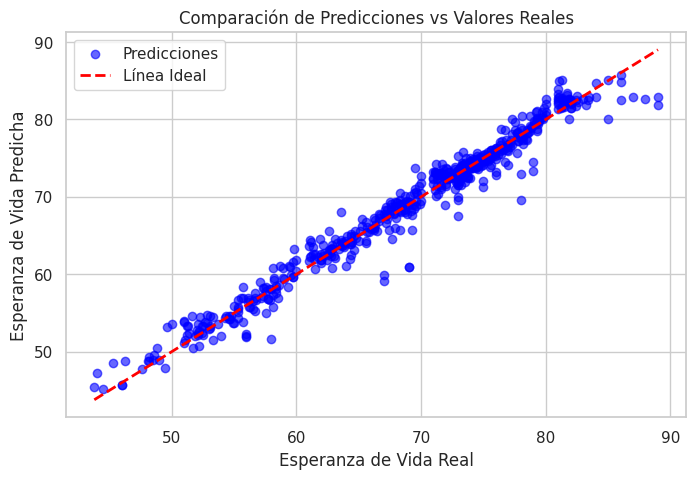

In [29]:
# Crear el gráfico de dispersión para comparar valores reales vs predichos
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color="red", linewidth=2, label="Línea Ideal")

# Configurar etiquetas y título
plt.xlabel("Esperanza de Vida Real")
plt.ylabel("Esperanza de Vida Predicha")
plt.title("Comparación de Predicciones vs Valores Reales")
plt.legend()
plt.show()


In [32]:
# Texto con el análisis de los resultados obtenidos
analysis_text = """
# **Análisis de Resultados del Modelo XGBoost para Esperanza de Vida**

##  **1. Exploración de los Datos**
- Se analizaron las relaciones entre diferentes variables y la esperanza de vida.
- Se observaron **correlaciones positivas** entre la esperanza de vida y variables como **composición de ingresos** y **escolarización**.
- Países desarrollados presentan **valores más altos** en estas variables y mayor esperanza de vida.

##  **2. Procesamiento de Datos**
- Se verificaron y rellenaron valores nulos mediante la moda.
- Se realizó la división de datos en **80% entrenamiento y 20% prueba**.
- Se convirtieron variables categóricas a numéricas mediante One-Hot Encoding.

##  **3. Entrenamiento del Modelo XGBoost**
- Se utilizó **XGBoost**, un modelo de regresión basado en Gradient Boosting.
- El modelo fue entrenado con 100 estimadores y una tasa de aprendizaje de 0.1.
- Se calcularon las métricas de evaluación:

  - **R² (Coeficiente de Determinación)**: Indica cuánto del comportamiento de la variable objetivo puede explicarse con las variables predictoras.

##  **4. Evaluación del Modelo**
- **R² obtenido:** Indica qué tan bien el modelo ajusta los datos.
- Se representó gráficamente las **predicciones vs valores reales** para evaluar el desempeño.

##  **Conclusiones**
El modelo XGBoost logró capturar relaciones importantes entre las variables y la esperanza de vida.
Variables como escolarización e ingresos tienen una influencia clave en la predicción.
A pesar del buen rendimiento, el modelo podría mejorarse con:
   - Más datos o características relevantes.
   - Optimización de hiperparámetros.
   - Métodos de selección de características.

 **Este análisis sugiere que los ingresos y la educación son determinantes clave para la esperanza de vida, lo que puede ayudar en la toma de decisiones para políticas públicas y estrategias de salud global.**
"""

# Mostrar el análisis en Google Colab con formato Markdown
from IPython.display import display, Markdown
display(Markdown(analysis_text))



# **Análisis de Resultados del Modelo XGBoost para Esperanza de Vida**

##  **1. Exploración de los Datos**
- Se analizaron las relaciones entre diferentes variables y la esperanza de vida.
- Se observaron **correlaciones positivas** entre la esperanza de vida y variables como **composición de ingresos** y **escolarización**.
- Países desarrollados presentan **valores más altos** en estas variables y mayor esperanza de vida.

##  **2. Procesamiento de Datos**
- Se verificaron y rellenaron valores nulos mediante la moda.
- Se realizó la división de datos en **80% entrenamiento y 20% prueba**.
- Se convirtieron variables categóricas a numéricas mediante One-Hot Encoding.

##  **3. Entrenamiento del Modelo XGBoost**
- Se utilizó **XGBoost**, un modelo de regresión basado en Gradient Boosting.
- El modelo fue entrenado con 100 estimadores y una tasa de aprendizaje de 0.1.
- Se calcularon las métricas de evaluación:

  - **R² (Coeficiente de Determinación)**: Indica cuánto del comportamiento de la variable objetivo puede explicarse con las variables predictoras.

##  **4. Evaluación del Modelo**
- **R² obtenido:** Indica qué tan bien el modelo ajusta los datos.
- Se representó gráficamente las **predicciones vs valores reales** para evaluar el desempeño.

##  **Conclusiones**
El modelo XGBoost logró capturar relaciones importantes entre las variables y la esperanza de vida.  
Variables como escolarización e ingresos tienen una influencia clave en la predicción.  
A pesar del buen rendimiento, el modelo podría mejorarse con:
   - Más datos o características relevantes.
   - Optimización de hiperparámetros.
   - Métodos de selección de características.

 **Este análisis sugiere que los ingresos y la educación son determinantes clave para la esperanza de vida, lo que puede ayudar en la toma de decisiones para políticas públicas y estrategias de salud global.**
